In [5]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import pandas as pd

In [6]:
data = pd.read_csv("../data/all_data.csv")
target = data.iloc[:,51]
features = data.iloc[:,1:51]

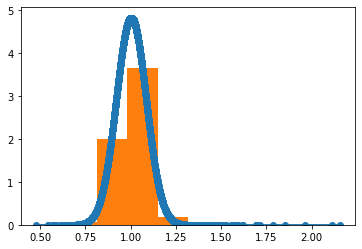

In [7]:
sorted_target = sorted(target)

fit = stats.norm.pdf(sorted_target, np.mean(sorted_target), np.std(sorted_target))  #this is a fitting indeed

pl.plot(sorted_target,fit,'-o')

pl.hist(sorted_target,density=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 

In [8]:
print(type(target))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
data_max = max(target)
data_min = min(target)
data_range = data_max - data_min
print(data_range, data_max, data_min)

df = data.iloc[:,1:]
df

1.6814339011044555 2.158060831840756 0.4766269307363007


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.732586,1.000000,-267.438456,100.000000,-0.543079,0.726876,0.000000,-305.977599,0.000000,-2.606053,...,1.000000,-67.197387,58.911769,-0.274286,0.845666,1.000000,-65.512012,54.050572,0.206006,0.943828
1,0.726876,0.000000,-305.977599,0.000000,-2.606053,0.746626,1.000000,-206.161158,82.524541,-2.103686,...,1.000000,-65.512012,54.050572,0.206006,0.852938,1.000000,-48.443058,53.741353,0.244291,0.871262
2,0.746626,1.000000,-206.161158,82.524541,-2.103686,0.804713,1.000000,-21.933089,92.757045,0.665890,...,1.000000,-48.443058,53.741353,0.244291,0.854295,0.000000,-32.312811,50.803734,0.184482,0.788454
3,0.804713,1.000000,-21.933089,92.757045,0.665890,0.804533,0.000000,-57.094676,50.003979,0.712023,...,0.000000,-32.312811,50.803734,0.184482,0.849418,0.000000,-49.146289,47.605846,0.050899,0.860677
4,0.804533,0.000000,-57.094676,50.003979,0.712023,0.806263,0.000000,-76.269589,50.861004,0.625267,...,0.000000,-49.146289,47.605846,0.050899,0.850252,0.000000,-95.086891,50.530626,-0.179422,1.051729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,-0.005516,-13.451483,-5.968156,2.040328,9.091436,-0.005378,-46.581001,-5.450128,-1.990613,9.315472,...,-60.504867,-0.599477,5.983468,7.151481,-0.001567,-45.788314,1.529321,4.458990,6.501116,0.913916
10122,-0.005378,-46.581001,-5.450128,-1.990613,9.315472,-0.004572,5.876998,1.723972,4.324914,8.888706,...,-45.788314,1.529321,4.458990,6.501116,-0.002878,-108.717443,-0.964393,2.564819,7.616473,1.018863
10123,-0.004572,5.876998,1.723972,4.324914,8.888706,-0.002625,1.387537,4.721469,10.593546,8.467536,...,-108.717443,-0.964393,2.564819,7.616473,-0.003202,-36.404499,-2.289458,1.928370,7.725917,1.013033
10124,-0.002625,1.387537,4.721469,10.593546,8.467536,-0.001345,-46.016575,10.825438,10.571701,7.193546,...,-36.404499,-2.289458,1.928370,7.725917,-0.002976,-40.421757,11.334117,2.991536,7.702866,0.936996


In [11]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/all_data.csv")
target = data.iloc[:,51]
features = data.iloc[:,1:51]

# 60-20-20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {"criterion": ["mse", "friedman_mse", "mae", "poisson"],
          "splitter": ["best", "random"]
}

regressor = DecisionTreeRegressor()

# clf = GridSearchCV(regressor, params, verbose=2, cv=2)

# regressor = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_squared_error(y_test, preds)

0.01583505086724241

In [13]:
print(type(preds))
print(type(y_test.to_numpy()))

y_test = y_test.to_numpy()
preds
y_test

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([0.97554865, 1.16941653, 0.93182462, ..., 0.88034809, 0.8863541 ,
       0.9055405 ])

In [14]:
pred_yon = []
gercek_yon = []

for i in range(len(preds)):
    if preds[i] < 1:
        continue
        pred_yon.append("neg")
    else:
        pred_yon.append("pos")

        if y_test[i] < 1:
            gercek_yon.append("neg")
        else:
            gercek_yon.append("pos")



from sklearn.metrics import accuracy_score
accuracy_score(pred_yon, gercek_yon)

0.4836795252225519

In [21]:
print(preds*100)
print(y_test*100)
mean_squared_error(y_test*100, preds*100)
from sklearn.metrics import r2_score
r2_score(y_test, preds)

[ 99.91623174  76.89621524  96.84474102 ...  99.11275845 106.52119628
 101.79420356]
[ 97.55486541 116.94165339  93.18246171 ...  88.03480922  88.63541044
  90.55405034]


-1.308093494137426

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)
X = X_train
y = y_train

In [17]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)

In [19]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
mean_squared_error(y_test*100, y_1*100)
# mean_squared_error(y_test*100, y_2*100)

66.8133004779463

In [ ]:
pred_yon = []
gercek_yon = []

for i in range(len(y_1)):
    if y_2[i] < 1:
        continue
        pred_yon.append("neg")
    else:
        pred_yon.append("pos")

        if y_test[i] < 1:
            gercek_yon.append("neg")
        else:
            gercek_yon.append("pos")



from sklearn.metrics import accuracy_score
accuracy_score(pred_yon, gercek_yon)

0.5032295948326483

In [ ]:
df = pd.read_csv("data/raw_data/ONT-USD.csv")

data = df.iloc[:, 4]
hist = []
target = []
length = 12

for i in range(len(data)-length-30):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)

In [ ]:
regr_1.fit(hist, target)
regr_2.fit(hist, target)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300)

In [ ]:
y_1 = regr_1.predict(hist)
y_2 = regr_2.predict(hist)

In [ ]:
mean_squared_error(target, y_1)

0.021543353562460503

1.4092799425125122 1.4794950910976954
1.310420036315918 1.4812978329481903
1.3693100214004517 1.3944183703925874
1.4321800470352173 1.4758442148156123
1.5083999633789062 1.4892158699035645
1.743939995765686 1.5792436554076823
2.1913399696350098 1.915594691496629
2.3264400959014893 2.3557425907679965
2.137589931488037 2.343630951993606
2.305389881134033 2.3321262408386576
2.058379888534546 2.3406809303495617
2.0704801082611084 1.95576782557216
2.062000036239624 1.9537229766236974
2.2922298908233643 2.0963405695828525
2.442579984664917 2.3146247452703017
2.860029935836792 2.5506710339718914
3.0618300437927246 2.715481985699047
3.780940055847168 3.5131386007581438
3.493230104446411 3.6457454608036923
3.483289957046509 3.6733828253216214
4.62129020690918 4.426707989291141
4.2954301834106445 4.425774192810058
4.397459983825684 4.376207590103149
4.206429958343506 4.367676431482488
4.34414005279541 4.3895340919494625
4.508679866790772 4.380768299102783
4.140960216522217 4.376207590103149
4.07